# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)
len(cities)

['taolanaro', 'avarua', 'rikitea', 'tiarei', 'albany', 'sentyabrskiy', 'maningrida', 'punta arenas', 'qaanaaq', 'leningradskiy', 'georgetown', 'atuona', 'hermanus', 'puerto ayora', 'hilo', 'jinchengjiang', 'khatanga', 'tuatapere', 'santa marta', 'bethel', 'coihaique', 'axim', 'iralaya', 'mackenzie', 'vaitupu', 'mamu kanjan', 'bluff', 'hami', 'cape town', 'hualmay', 'amderma', 'ko samui', 'san patricio', 'cabo san lucas', 'busselton', 'fortuna', 'isangel', 'asyut', 'vanimo', 'norman wells', 'hasaki', 'dikson', 'anadyr', 'ahipara', 'cidreira', 'castro', 'vaini', 'dolinsk', 'ushuaia', 'geraldton', 'puro', 'hobart', 'zaozerne', 'bredasdorp', 'jamestown', 'viseu', 'kloulklubed', 'lebu', 'kautokeino', 'mahebourg', 'carnarvon', 'los llanos de aridane', 'chokurdakh', 'nikolskoye', 'walvis bay', 'lishu', 'port alfred', 'prince george', 'sawakin', 'palmer', 'caravelas', 'arman', 'port elizabeth', 'esperance', 'tallahassee', 'mataura', 'sokoto', 'raudeberg', 'barra do garcas', 'claremore', 'ghanz

622

In [29]:
### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"http://{url}appid={weather_api_key}&units={units}&q="
print(query_url)

# set up lists to hold reponse info
lat = []
lng = []
temp = []
humi = []
wind = []
cloud = []
valid_cities = []
countries = []
datetime = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    try:
        print(f"Processing Record {i} of Set {len(cities)} | {cities[i]}")
        response = requests.get(query_url + cities[i]).json()
        #pprint(response)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humi.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        valid_cities.append(cities[i])
        countries.append(response['sys']['country'])
        datetime.append(response['dt'])
    except:
        print("### City not found. Skipping...")
    
print("-----------------------------")
print("End of Data Retrieval") 
print("-----------------------------")

#print(f"The latitude information received is: {len(lat)} {lat}")
#print(f"The latitude information received is: {len(lng)} {lng}")
#print(f"The temperature information received is: {len(temp)} {temp}")
#print(f"The humidity information received is: {len(humi)} {humi}")
#print(f"The wind information received is: {len(wind)} {wind}")
#print(f"The cloud information received is: {len(cloud)} {cloud}")

ssing Record 197 of Set 622 | dongzhen
Processing Record 198 of Set 622 | ajdabiya
Processing Record 199 of Set 622 | sandnessjoen
Processing Record 200 of Set 622 | vostok
Processing Record 201 of Set 622 | kinkala
Processing Record 202 of Set 622 | corn island
Processing Record 203 of Set 622 | lively
Processing Record 204 of Set 622 | maracacume
Processing Record 205 of Set 622 | mangai
Processing Record 206 of Set 622 | logansport
Processing Record 207 of Set 622 | nanortalik
Processing Record 208 of Set 622 | mnogovershinnyy
Processing Record 209 of Set 622 | ostrovnoy
Processing Record 210 of Set 622 | xinxiang
Processing Record 211 of Set 622 | mombetsu
Processing Record 212 of Set 622 | elesbao veloso
Processing Record 213 of Set 622 | kadykchan
### City not found. Skipping...
Processing Record 214 of Set 622 | algiers
Processing Record 215 of Set 622 | dingle
Processing Record 216 of Set 622 | komsomolskiy
Processing Record 217 of Set 622 | harsin
Processing Record 218 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_df = pd.DataFrame({'City':valid_cities,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':temp,
                        'Humidity':humi,
                        'Cloudiness':cloud,
                        'Wind Speed':wind,
                        'Country':countries,
                        'Date':pd.to_datetime(datetime, unit='s')})
city_df.sort_values(['Humidity'], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
433,edgewater,28.99,-80.90,72.57,100,90,11.41,US,2020-05-17 01:12:43
270,vila velha,-20.33,-40.29,68.54,100,90,2.24,BR,2020-05-17 01:14:39
514,astoria,46.19,-123.83,54.46,100,90,12.75,US,2020-05-17 01:15:02
130,vilcun,-38.65,-72.23,57.99,100,90,2.24,CL,2020-05-17 01:14:03
508,estelle,29.85,-90.11,75.60,100,90,13.87,US,2020-05-17 01:15:41
...,...,...,...,...,...,...,...,...,...
116,sabha,27.04,14.43,80.47,14,0,13.69,LY,2020-05-17 01:13:59
208,saint george,37.10,-113.58,87.67,14,1,9.17,US,2020-05-17 01:11:48
285,truth or consequences,33.13,-107.25,88.16,10,1,11.41,US,2020-05-17 01:14:42
284,usak,38.50,29.42,66.99,10,28,58.00,TR,2020-05-17 01:14:42


In [31]:
city_df[city_df.Humidity > 100].sort_values(['Humidity'], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [32]:
## Inspect the data and remove the cities where the humidity > 100%.
# ----
# Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#  Get the indices of cities that have humidity over 100%.


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Export the City_Data into a csv
city_df.to_csv("clean_city_data.csv", index=False)

In [35]:
# Extract relevant fields from the data frame
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,84.20,66,40,16.11,CK,2020-05-17 01:13:32
1,rikitea,-23.12,-134.97,76.98,85,100,11.01,PF,2020-05-17 01:13:32
2,tiarei,-17.53,-149.33,87.80,70,40,11.41,PF,2020-05-17 01:13:32
3,albany,42.60,-73.97,62.76,49,54,2.48,US,2020-05-17 01:09:33
4,maningrida,-12.07,134.27,83.12,63,1,16.73,AU,2020-05-17 01:13:33
...,...,...,...,...,...,...,...,...,...
568,moses lake,47.13,-119.28,73.67,27,75,5.82,US,2020-05-17 01:15:56
569,anito,12.45,125.29,82.81,84,89,11.72,PH,2020-05-17 01:15:57
570,whitehorse,60.72,-135.05,48.54,70,75,17.22,CA,2020-05-17 01:13:57
571,hannibal,39.71,-91.36,67.08,88,90,4.70,US,2020-05-17 01:15:57


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [36]:
## Latitude vs. Temperature Plot
# seems like

R squared: 0.24362663645134564
The correlation between both factors is -0.49


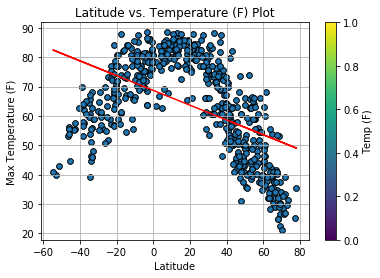

In [37]:
## Convert to floats and store latitude and temperature as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Max Temp'].astype('float')
#y_values = city_df['Lng'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Max Temp'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Temperature (F) Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Temp (F)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Temp.png")
# Show plot
plt.show()

## Latitude vs. Humidity Plot

R squared: 0.0008374840522584917
The correlation between both factors is -0.03


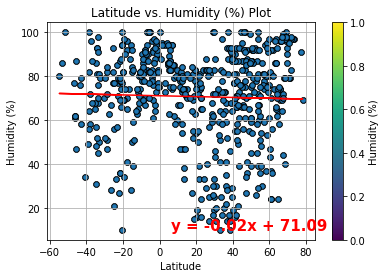

In [38]:
## Convert to floats and store latitude and Humidity as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Humidity'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Humidity (%) Plot")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Humidity (%)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Humi.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

R squared: 0.016939906224744273
The correlation between both factors is 0.13


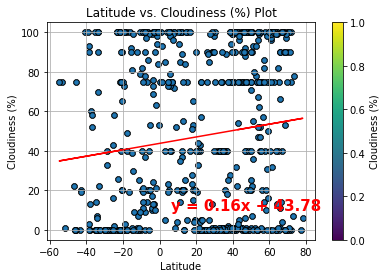

In [39]:
## Convert to floats and store latitude and Cloudiness as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Cloudiness'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Cloudiness (%) Plot")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Cloudiness (%)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Cloud.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

R squared: 0.018241040443724585
The correlation between both factors is 0.14


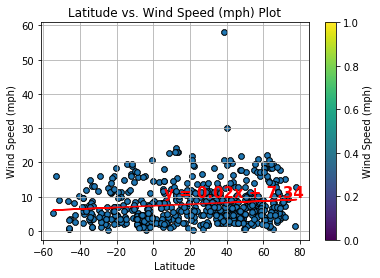

In [40]:
## Convert to floats and store latitude and Wind Speed as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Wind Speed'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Wind Speed (mph) Plot")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Wind Speed (mph)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Wind.png")
# Show plot
plt.show()

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinearRegress(input_df,direction,x,y):
    # split df into 'North' or 'South' according to input direction
    if direction == "North":
        df = input_df[input_df.Lat >= 0]
    else:
        df = input_df[input_df.Lat < 0]

    ## Convert to floats and store x and y values
    x_values = df[x].astype('float')
    y_values = df[y].astype('float')

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values,marker="8",edgecolors="black")

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

    # Label plot
    plt.title(f"{x} vs. {y} Plot")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.grid(True)
    clb = plt.colorbar()
    clb.set_label(y)

    # Print r square value & correlation 
    print(f"R squared: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    # Save the figure
    plt.savefig(f"{x}-vs-{y}-regress-{direction}.png")
    # Show plot
    plt.show()

    return df


In [42]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df.Lat >= 0]
south_df = city_df[city_df.Lat < 0]
print(north_df.Lat.head(5))
print(south_df.Lat.head(5))

3     42.60
6     77.48
7     69.38
8      5.41
12    19.73
Name: Lat, dtype: float64
0   -21.21
1   -23.12
2   -17.53
4   -12.07
5   -53.15
Name: Lat, dtype: float64


R squared: 0.7449565991800443
The correlation between both factors is -0.86


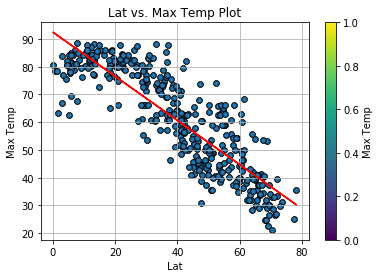

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,albany,42.60,-73.97,62.76,49,54,2.48,US,2020-05-17 01:09:33
6,qaanaaq,77.48,-69.36,25.18,91,0,1.30,GL,2020-05-17 01:13:33
7,leningradskiy,69.38,178.42,30.04,97,100,5.10,RU,2020-05-17 01:13:34
8,georgetown,5.41,100.34,79.25,94,20,4.70,MY,2020-05-17 01:10:10
12,hilo,19.73,-155.09,76.75,54,90,11.41,US,2020-05-17 01:13:35
...,...,...,...,...,...,...,...,...,...
568,moses lake,47.13,-119.28,73.67,27,75,5.82,US,2020-05-17 01:15:56
569,anito,12.45,125.29,82.81,84,89,11.72,PH,2020-05-17 01:15:57
570,whitehorse,60.72,-135.05,48.54,70,75,17.22,CA,2020-05-17 01:13:57
571,hannibal,39.71,-91.36,67.08,88,90,4.70,US,2020-05-17 01:15:57


In [43]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Max Temp')

R squared: 0.5784120193113537
The correlation between both factors is 0.76


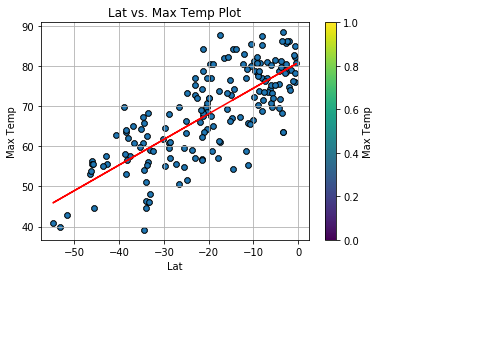

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,84.20,66,40,16.11,CK,2020-05-17 01:13:32
1,rikitea,-23.12,-134.97,76.98,85,100,11.01,PF,2020-05-17 01:13:32
2,tiarei,-17.53,-149.33,87.80,70,40,11.41,PF,2020-05-17 01:13:32
4,maningrida,-12.07,134.27,83.12,63,1,16.73,AU,2020-05-17 01:13:33
5,punta arenas,-53.15,-70.92,39.94,86,75,16.11,CL,2020-05-17 01:13:33
...,...,...,...,...,...,...,...,...,...
556,araucaria,-25.59,-49.41,54.88,93,0,3.36,BR,2020-05-17 01:15:53
559,sambava,-14.27,50.17,74.35,83,30,8.75,MG,2020-05-17 01:15:54
561,cururupu,-1.83,-44.87,74.10,96,63,1.05,BR,2020-05-17 01:15:54
563,salinopolis,-0.61,-47.36,78.21,82,100,3.78,BR,2020-05-17 01:15:55


In [44]:
####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Max Temp')

R squared: 0.009318693653351426
The correlation between both factors is 0.1


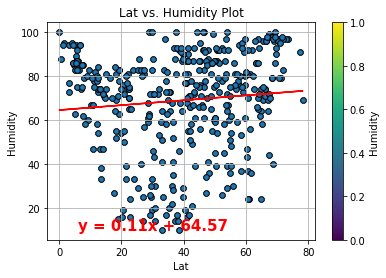

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,albany,42.60,-73.97,62.76,49,54,2.48,US,2020-05-17 01:09:33
6,qaanaaq,77.48,-69.36,25.18,91,0,1.30,GL,2020-05-17 01:13:33
7,leningradskiy,69.38,178.42,30.04,97,100,5.10,RU,2020-05-17 01:13:34
8,georgetown,5.41,100.34,79.25,94,20,4.70,MY,2020-05-17 01:10:10
12,hilo,19.73,-155.09,76.75,54,90,11.41,US,2020-05-17 01:13:35
...,...,...,...,...,...,...,...,...,...
568,moses lake,47.13,-119.28,73.67,27,75,5.82,US,2020-05-17 01:15:56
569,anito,12.45,125.29,82.81,84,89,11.72,PH,2020-05-17 01:15:57
570,whitehorse,60.72,-135.05,48.54,70,75,17.22,CA,2020-05-17 01:13:57
571,hannibal,39.71,-91.36,67.08,88,90,4.70,US,2020-05-17 01:15:57


In [45]:
####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Humidity')

R squared: 0.07300073877261128
The correlation between both factors is 0.27


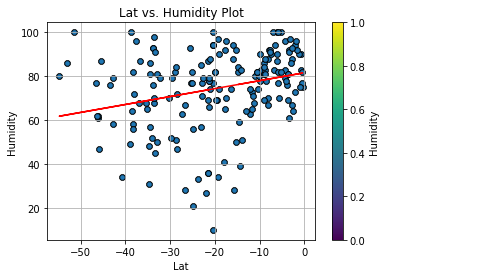

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,84.20,66,40,16.11,CK,2020-05-17 01:13:32
1,rikitea,-23.12,-134.97,76.98,85,100,11.01,PF,2020-05-17 01:13:32
2,tiarei,-17.53,-149.33,87.80,70,40,11.41,PF,2020-05-17 01:13:32
4,maningrida,-12.07,134.27,83.12,63,1,16.73,AU,2020-05-17 01:13:33
5,punta arenas,-53.15,-70.92,39.94,86,75,16.11,CL,2020-05-17 01:13:33
...,...,...,...,...,...,...,...,...,...
556,araucaria,-25.59,-49.41,54.88,93,0,3.36,BR,2020-05-17 01:15:53
559,sambava,-14.27,50.17,74.35,83,30,8.75,MG,2020-05-17 01:15:54
561,cururupu,-1.83,-44.87,74.10,96,63,1.05,BR,2020-05-17 01:15:54
563,salinopolis,-0.61,-47.36,78.21,82,100,3.78,BR,2020-05-17 01:15:55


In [46]:
####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Humidity')

R squared: 0.0074069922562855954
The correlation between both factors is 0.09


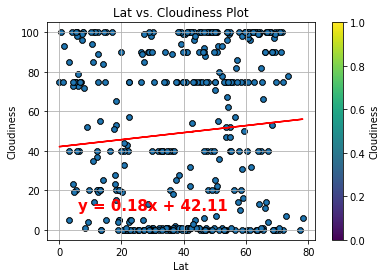

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,albany,42.60,-73.97,62.76,49,54,2.48,US,2020-05-17 01:09:33
6,qaanaaq,77.48,-69.36,25.18,91,0,1.30,GL,2020-05-17 01:13:33
7,leningradskiy,69.38,178.42,30.04,97,100,5.10,RU,2020-05-17 01:13:34
8,georgetown,5.41,100.34,79.25,94,20,4.70,MY,2020-05-17 01:10:10
12,hilo,19.73,-155.09,76.75,54,90,11.41,US,2020-05-17 01:13:35
...,...,...,...,...,...,...,...,...,...
568,moses lake,47.13,-119.28,73.67,27,75,5.82,US,2020-05-17 01:15:56
569,anito,12.45,125.29,82.81,84,89,11.72,PH,2020-05-17 01:15:57
570,whitehorse,60.72,-135.05,48.54,70,75,17.22,CA,2020-05-17 01:13:57
571,hannibal,39.71,-91.36,67.08,88,90,4.70,US,2020-05-17 01:15:57


In [47]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Cloudiness')

R squared: 0.07910421532154147
The correlation between both factors is 0.28


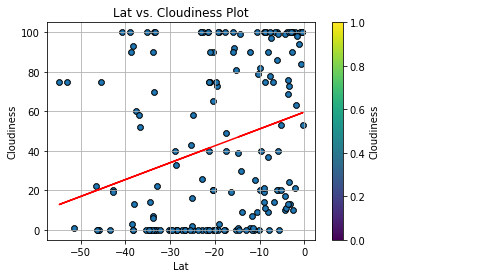

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,84.20,66,40,16.11,CK,2020-05-17 01:13:32
1,rikitea,-23.12,-134.97,76.98,85,100,11.01,PF,2020-05-17 01:13:32
2,tiarei,-17.53,-149.33,87.80,70,40,11.41,PF,2020-05-17 01:13:32
4,maningrida,-12.07,134.27,83.12,63,1,16.73,AU,2020-05-17 01:13:33
5,punta arenas,-53.15,-70.92,39.94,86,75,16.11,CL,2020-05-17 01:13:33
...,...,...,...,...,...,...,...,...,...
556,araucaria,-25.59,-49.41,54.88,93,0,3.36,BR,2020-05-17 01:15:53
559,sambava,-14.27,50.17,74.35,83,30,8.75,MG,2020-05-17 01:15:54
561,cururupu,-1.83,-44.87,74.10,96,63,1.05,BR,2020-05-17 01:15:54
563,salinopolis,-0.61,-47.36,78.21,82,100,3.78,BR,2020-05-17 01:15:55


In [48]:
####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Cloudiness')

R squared: 6.629868523075582e-08
The correlation between both factors is 0.0


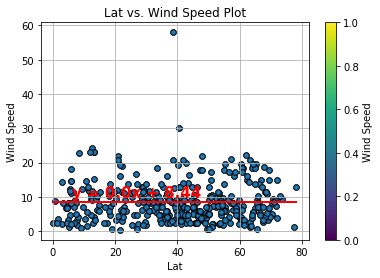

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,albany,42.60,-73.97,62.76,49,54,2.48,US,2020-05-17 01:09:33
6,qaanaaq,77.48,-69.36,25.18,91,0,1.30,GL,2020-05-17 01:13:33
7,leningradskiy,69.38,178.42,30.04,97,100,5.10,RU,2020-05-17 01:13:34
8,georgetown,5.41,100.34,79.25,94,20,4.70,MY,2020-05-17 01:10:10
12,hilo,19.73,-155.09,76.75,54,90,11.41,US,2020-05-17 01:13:35
...,...,...,...,...,...,...,...,...,...
568,moses lake,47.13,-119.28,73.67,27,75,5.82,US,2020-05-17 01:15:56
569,anito,12.45,125.29,82.81,84,89,11.72,PH,2020-05-17 01:15:57
570,whitehorse,60.72,-135.05,48.54,70,75,17.22,CA,2020-05-17 01:13:57
571,hannibal,39.71,-91.36,67.08,88,90,4.70,US,2020-05-17 01:15:57


In [49]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Wind Speed')

R squared: 0.00030530285356019954
The correlation between both factors is -0.02


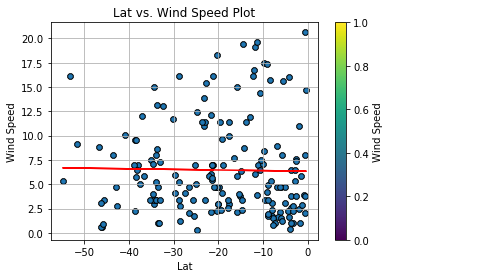

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,84.20,66,40,16.11,CK,2020-05-17 01:13:32
1,rikitea,-23.12,-134.97,76.98,85,100,11.01,PF,2020-05-17 01:13:32
2,tiarei,-17.53,-149.33,87.80,70,40,11.41,PF,2020-05-17 01:13:32
4,maningrida,-12.07,134.27,83.12,63,1,16.73,AU,2020-05-17 01:13:33
5,punta arenas,-53.15,-70.92,39.94,86,75,16.11,CL,2020-05-17 01:13:33
...,...,...,...,...,...,...,...,...,...
556,araucaria,-25.59,-49.41,54.88,93,0,3.36,BR,2020-05-17 01:15:53
559,sambava,-14.27,50.17,74.35,83,30,8.75,MG,2020-05-17 01:15:54
561,cururupu,-1.83,-44.87,74.10,96,63,1.05,BR,2020-05-17 01:15:54
563,salinopolis,-0.61,-47.36,78.21,82,100,3.78,BR,2020-05-17 01:15:55


In [50]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Wind Speed')

In [51]:
# based on the above plots, it seems that Northern Hemisphere Max Temp has the strongest correlation with Latitude